Basic Imports

In [2]:
import pandas
import marketData
import Orders
import Plot
import Indicators

Getting price charts

[        nan         nan         nan ... 53.85144022 59.26851691
 43.92074626]
                         Open      High       Low     Close   Volume  \
Time                                                                   
2020-09-10 19:15:00  10282.67  10282.67  10275.71  10277.53   67.796   
2020-09-10 19:16:00  10277.53  10277.53  10254.23  10262.37  281.560   
2020-09-10 19:17:00  10262.37  10264.56  10256.82  10259.67  151.106   
2020-09-10 19:18:00  10259.68  10266.22  10255.14  10266.22  107.800   
2020-09-10 19:19:00  10266.22  10267.45  10250.01  10252.56  245.352   
...                       ...       ...       ...       ...      ...   
2021-03-03 17:56:00  51286.45  51334.68  51286.45  51332.99   85.833   
2021-03-03 17:57:00  51332.99  51400.00  51321.73  51390.00  116.297   
2021-03-03 17:58:00  51389.99  51430.45  51380.21  51392.86  146.871   
2021-03-03 17:59:00  51392.85  51392.85  51320.28  51345.18  149.332   
2021-03-03 18:00:00  51345.18  51345.18  51300.00  51305.

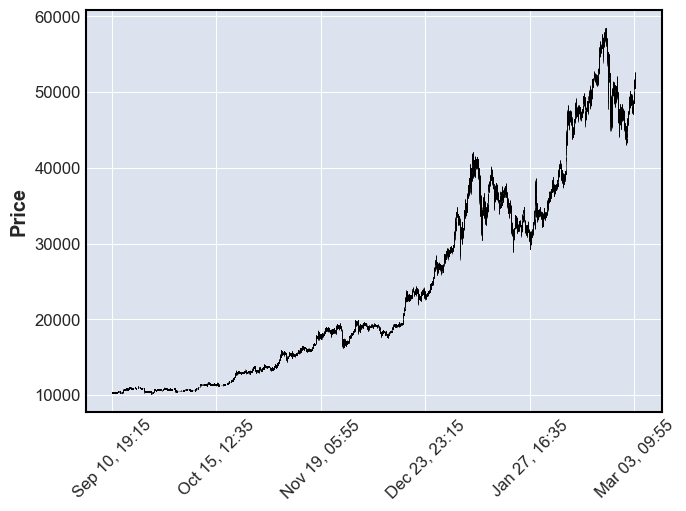

In [8]:
#df = marketData.getPrices("BTCUSDT", "1m", 500)
#print(df)
df = pandas.read_csv("BTCUSDT1m.csv")
df = Indicators.Stochastic(df)
df = Indicators.ADX(df)
df["Time"] = pandas.to_datetime(df["Time"])
df.set_index("Time", inplace=True)
Plot.plotCandles(df)
df.to_csv("BTCUSDT1mQ.csv")
print(df)

Getting order book

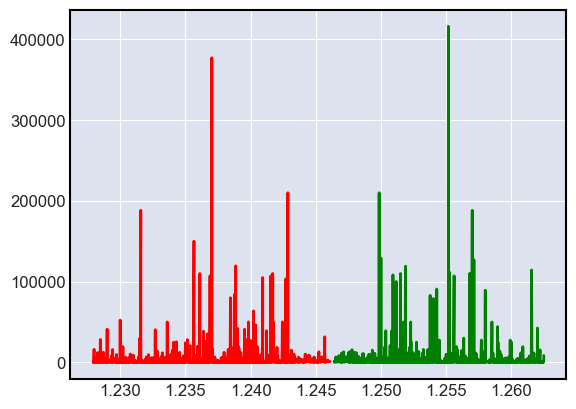

In [28]:
df = Orders.OrderBook("ADAUSDT")
Plot.plotSR(df[0], df[1])

Getting historical data

In [41]:
import time
#Time to nanoseconds
# pair = "BTCUSDT"
# timeframe = "15m"
# current = time.time() * 1000
# current = round(current)
# #Time step for requests
# block = 500*60*1000
# current -= block
# #Populating latest
# df = marketData.getPrices(pair, timeframe, 500)
# for i in range(0, 35):
#     print(i)
#     df = df.append(marketData.getHistorical(pair, timeframe, current - block, current))
#     current -= block
#
# df = df.sort_index()
# df.to_csv(pair+timeframe+".csv")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


Using Keras

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


dataset = pd.read_csv("Data/dataset.csv").apply(pd.to_numeric)
labels = dataset.pop("Position").to_numpy()
dataset.pop("0")
dataset = dataset.to_numpy()
print(dataset.shape)



model = tf.keras.models.Sequential([
    keras.layers.Dense(400, activation="sigmoid"),
    keras.layers.Dense(600, activation="sigmoid"),
    #tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(600),
    keras.layers.Dense(400),
    keras.layers.Dense(100),
    keras.layers.Dense(3, activation="softmax")
])

print("Compiling model")
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Checkpointing
checkpoint_path = "checkpoints/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True)
#model.load_weights(checkpoint_path)

print("Fitting")
model.fit(dataset, labels, epochs=10, callbacks=[cp_callback])


(250402, 400)
Compiling model
Fitting
Epoch 1/10
250402/250402 [==============================] - 18s 73us/sample - loss: 1342568626.9889 - acc: 0.3337

preparing as a single csv

In [1]:
import pandas as pd
features = pd.read_csv("Data/result.csv")
labels = pd.read_csv("Data/training.csv")
labels.columns=["Position"]

df = pd.concat([features,labels], axis=1)
print(df)
df.to_csv("Data/dataset.csv")
print("Done!")


               0         1         2         3         4         5         6  \
0       0.035200  0.032954  0.035274  0.036992 -0.331223  0.443335  0.370000   
1       0.036982  0.027874  0.036837  0.030443 -0.123690  0.402988  0.448774   
2       0.030259  0.027974  0.033739  0.036196  0.034492  0.187547  0.344623   
3       0.035636  0.038222  0.044512  0.043888 -0.099484 -0.064752  0.175261   
4       0.044556  0.038091  0.039680  0.034211 -0.007781 -0.266661 -0.047956   
...          ...       ...       ...       ...       ...       ...       ...   
250397 -0.004167  0.012059  0.014390  0.030946  0.034283 -0.102333 -0.026241   
250398  0.030948  0.041118  0.031213  0.037042  0.056071 -0.071484 -0.036607   
250399  0.037026  0.043345  0.035632  0.047448  0.074330 -0.122860 -0.098893   
250400  0.047448  0.047902  0.043307  0.049985  0.067147  0.073123 -0.040407   
250401  0.049989  0.044378  0.047545  0.042158  0.043512  0.169909  0.040057   

               7         8         9  .